In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sts
from scipy import optimize as opt
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
Cauchy = np.genfromtxt('Cauchy.csv', delimiter=',')

In [3]:
Cauchy[:50]

array([ 639.42,  636.01,  636.97,  634.66,  644.76,  631.5 ,  639.21,
        635.5 ,  635.34,  636.55,  626.68,  640.67,  635.63,  636.31,
        629.53,  642.02,  656.7 ,  635.75,  636.36,  648.05,  636.3 ,
        634.21,  634.65,  636.64,  634.21,  635.01,  718.39,  636.53,
        634.27,  635.5 ,  635.67,  638.03,  635.75,  646.54,  637.54,
        635.63,  637.09,  623.72,  635.39,  634.24,  633.64,  635.08,
        636.02,  637.23,  641.67,  631.74,  636.52,  636.92,  634.61,
        640.36])

In [4]:
# Функция, считающая логарифм плотности
def log_p(x, x0):
    return math.log10(1 / (math.pi * (1 + (x - x0)**2) ))
# Логарифмическая функция правдоподобия
def L(x0, k):
    return sum( [ log_p(x, x0) for x in Cauchy[:k] ] )

Оценка параметра сдвига  635.965610245


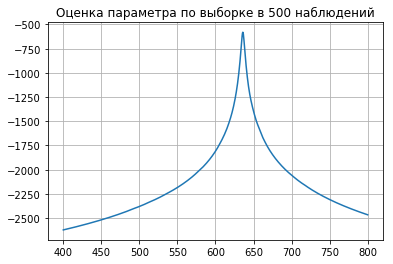

Оценка параметра сдвига  636.000879875


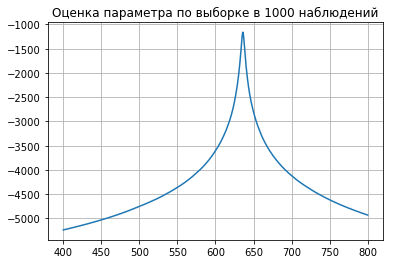

In [5]:
# Размеры выборок, для которых будем оценивать параметр
K = [500, 1000]
# Результаты отпимизации функции правдоподобия
X0_opt = []
for k in K:
    # Начальное значение параметра
    x0 = 0
    # Ищем максимум функции правдоподобия
    x0_opt = opt.minimize(lambda x: -L(x, k), [x0], method='L-BFGS-B', options={'eps':0.01} )
    X0_opt.append(x0_opt)
    # Построим график функции правдоподобия для текущей выборки
    X = np.linspace(400, 800, 1000)
    Y = [L(x, k) for x in X]
    print("Оценка параметра сдвига ", x0_opt.x[0])
    plt.subplot()
    plt.title("Оценка параметра по выборке в %d наблюдений" %(k))
    plt.plot(X, Y)
    plt.grid()
    plt.show()

Значение логарифмической функции правдоподобия уменьшилось в 2 раза, потому что в ней стало в 2 раза больше слогаемых.